<a href="https://colab.research.google.com/github/Sid-Oya/DS-Unit-2-Kaggle-Challenge/blob/master/Sidoney_DS_223_CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 3*

---

# Cross-Validation


## Assignment
- [ ] [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Continue to participate in our Kaggle challenge. 
- [ ] Use scikit-learn for hyperparameter optimization with RandomizedSearchCV.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


**You can't just copy** from the lesson notebook to this assignment.

- Because the lesson was **regression**, but the assignment is **classification.**
- Because the lesson used [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html), which doesn't work as-is for _multi-class_ classification.

So you will have to adapt the example, which is good real-world practice.

1. Use a model for classification, such as [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. Use hyperparameters that match the classifier, such as `randomforestclassifier__ ...`
3. Use a metric for classification, such as [`scoring='accuracy'`](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)
4. If you’re doing a multi-class classification problem — such as whether a waterpump is functional, functional needs repair, or nonfunctional — then use a categorical encoding that works for multi-class classification, such as [OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html) (not [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html))



## Stretch Goals

### Reading
- Jake VanderPlas, [Python Data Science Handbook, Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), Hyperparameters and Model Validation
- Jake VanderPlas, [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=107)
- Ron Zacharski, [A Programmer's Guide to Data Mining, Chapter 5](http://guidetodatamining.com/chapter5/), 10-fold cross validation
- Sebastian Raschka, [A Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb)
- Peter Worcester, [A Comparison of Grid Search and Randomized Search Using Scikit Learn](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

### Doing
- Add your own stretch goals!
- Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/). See the previous assignment notebook for details.
- In additon to `RandomizedSearchCV`, scikit-learn has [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Another library called scikit-optimize has [`BayesSearchCV`](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html). Experiment with these alternatives.
- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?


### BONUS: Stacking!

Here's some code you can use to "stack" multiple submissions, which is another form of ensembling:

```python
import pandas as pd

# Filenames of your submissions you want to ensemble
files = ['submission-01.csv', 'submission-02.csv', 'submission-03.csv']

target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)
```

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [ ]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, train_size=0.80, test_size=0.20,
                              stratify=train['status_group'], random_state=42)

In [ ]:
train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [ ]:
print ("Training set:")
n_data  = len(train)
n_features = train.shape[1]
print ("Number of Records: {}".format(n_data))
print ("Number of Features: {}".format(n_features))


print ("\nValidation set:")
n_data  = len(val)
n_features = val.shape[1]
print ("Number of Records: {}".format(n_data))
print ("Number of Features: {}".format(n_features))


print ("\nTest set:")
n_data  = len(test)
n_features = test.shape[1]
print ("Number of Records: {}".format(n_data))
print ("Number of Features: {}".format(n_features))

Training set:
Number of Records: 47520
Number of Features: 41

Validation set:
Number of Records: 11880
Number of Features: 41

Test set:
Number of Records: 14358
Number of Features: 40


In [ ]:
train.isnull().sum().sum(), test.isnull().sum().sum(), val.isnull().sum().sum()

(36854, 10891, 9240)

In [ ]:
print("Total Test Features with NaN Values = " + str(test.columns[test.isnull().sum() != 0].size))
if (test.columns[test.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(test.columns[test.isnull().sum() != 0])))
    test[test.columns[test.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Test Features with NaN Values = 7
Features with NaN => ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']


In [ ]:
 train.loc[:, (train == 0).any(axis=0)]

,id,amount_tsh,gps_height,longitude,num_private,district_code,population,public_meeting,permit,construction_year
43360,72938,0.0,0,33.542898,0,4,0,True,NaN,0
7263,65358,500.0,2049,34.665760,0,4,175,True,True,2008
2486,469,25.0,290,38.238568,0,1,2300,True,False,2010
313,1298,0.0,0,30.716727,0,1,0,True,True,0
52726,27001,0.0,0,35.389331,0,6,0,True,True,0
...,...,...,...,...,...,...,...,...,...,...
9795,29534,50.0,489,38.268574,4,6,1300,True,False,2009
58170,20672,0.0,0,33.926294,0,3,0,True,True,0
17191,10282,0.0,599,39.262924,0,33,1,True,False,2012
8192,64193,30.0,426,39.348550,0,33,320,True,False,1988


In [ ]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    # Remove Null island (sometimes outliers will be coded as an extreme number)
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    

    # When columns have zeros and shouldn't, they are like null values
    #So we will replace the zeros with nulls, and impute missing values later
    #Also create a 'missing indicator" column, because the fact that values are missing may be a predictive signal

    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 'gps_height', 'population'] 

    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col + '_MISSING'] = X[col].isnull()

    # Drop duplicate columns
    duplicate = ['quantity_group', 'payment_type']
    X = X.drop(columns=duplicate)

    # Drop recorded_by (never varies) and id (always varies, random)
    unusable_variance = ['recorded_by', 'id']
    X = X.drop(columns=unusable_variance)
    
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['years'] = X['year_recorded'] - X['construction_year']
    X['years_MISSING'] = X['years'].isnull()

      # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [ ]:
train.isnull().sum().sum(), test.isnull().sum().sum(), val.isnull().sum().sum()

(106143, 31994, 26812)

In [ ]:
train = train.fillna(method='ffill')

In [ ]:
train = train.dropna()

In [ ]:
test = test.fillna(method='ffill')

In [ ]:
test = test.dropna()

In [ ]:
val = val.fillna(method='ffill')

In [ ]:
val = val.dropna()

In [ ]:
train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,longitude_MISSING,latitude_MISSING,construction_year_MISSING,gps_height_MISSING,population_MISSING,year_recorded,month_recorded,day_recorded,years,years_MISSING
7263,500.0,Rc Church,2049.0,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175.0,True,WUA,Tove Mtwango gravity Scheme,True,2008.0,gravity,gravity,gravity,wua,user-group,pay monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,False,False,False,False,False,2011,3,23,3.0,False
2486,25.0,Donor,290.0,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300.0,True,VWC,Tove Mtwango gravity Scheme,False,2010.0,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,False,False,False,False,False,2011,3,7,1.0,False
313,0.0,Government Of Tanzania,290.0,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,2300.0,True,VWC,Tove Mtwango gravity Scheme,True,2010.0,other,other,other,vwc,user-group,never pay,soft,good,enough,shallow well,shallow well,groundwater,other,other,non functional,False,False,True,True,True,2011,7,31,1.0,True
52726,0.0,Water,290.0,Gove,35.389331,-6.399942,Chama,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,2300.0,True,VWC,Zeje,True,2010.0,mono,mono,motorpump,vwc,user-group,pay per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional,False,False,True,True,True,2011,3,10,1.0,True
8558,0.0,Dwe/norad,1295.0,DWE,31.214583,-8.431428,Kwa Feston Mambosasa,0,Lake Tanganyika,Kisumba Kati,Rukwa,15,2,Sumbawanga Rural,Kasanga,200.0,True,VWC,Kisumba water supply,True,1986.0,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional,False,False,False,False,False,2011,8,7,25.0,False


In [ ]:
test.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,longitude_MISSING,latitude_MISSING,construction_year_MISSING,gps_height_MISSING,population_MISSING,year_recorded,month_recorded,day_recorded,years,years_MISSING
1,0.0,Government Of Tanzania,1569.0,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300.0,True,VWC,TPRI pipe line,True,2000.0,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,False,False,False,2013,2,4,13.0,False
2,0.0,Government Of Tanzania,1567.0,DWE,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500.0,True,VWC,P,True,2010.0,other,other,other,vwc,user-group,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,False,False,False,False,False,2013,2,1,3.0,False
3,0.0,Finn Water,267.0,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250.0,True,VWC,P,True,1987.0,other,other,other,vwc,user-group,unknown,soft,good,dry,shallow well,shallow well,groundwater,other,other,False,False,False,False,False,2013,1,22,26.0,False
4,500.0,Bruder,1260.0,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60.0,True,Water Board,BRUDER,True,2000.0,gravity,gravity,gravity,water board,user-group,pay monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,False,False,False,2013,3,27,13.0,False
5,0.0,Government Of Tanzania,1685.0,DWE,36.685279,-3.302420,Masaga,0,Pangani,Masaga,Arusha,2,2,Arusha Rural,Ilkiding'a,200.0,True,VWC,Timbolo sambasha TPRI pipe line,True,1990.0,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,False,False,False,2013,3,4,23.0,False


In [ ]:
train['status_group'].value_counts()

functional                 25806
non functional             18259
functional needs repair     3454
Name: status_group, dtype: int64

In [ ]:
val['status_group'].value_counts()

functional                 6449
non functional             4563
functional needs repair     862
Name: status_group, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
train['status_group']= label_encoder.fit_transform(train['status_group']) 
  
train['status_group'].unique() 

array([0, 2, 1])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
val['status_group']= label_encoder.fit_transform(val['status_group']) 
  
val['status_group'].unique() 

array([0, 2, 1])

In [ ]:
target = 'status_group'

train_features = train.drop(columns=[target])

numeric_features = train_features.select_dtypes(include='number').columns.tolist()

cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 20]. index.tolist()

features = numeric_features + categorical_features

In [ ]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [ ]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
   ce.OneHotEncoder(use_cat_names=True),
   SimpleImputer(strategy='median'),
   RandomForestClassifier(random_state=0, n_jobs=1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Validation Accuracy 0.8069732187973724


In [ ]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=0, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8065521307057436


In [ ]:
X_train.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,year_recorded,month_recorded,day_recorded,years,basin,public_meeting,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,longitude_MISSING,latitude_MISSING,construction_year_MISSING,gps_height_MISSING,population_MISSING,years_MISSING
7263,500.0,2049.0,34.665760,-9.308548,0,11,4,175.0,2008.0,2011,3,23,3.0,Rufiji,True,WUA,True,gravity,gravity,gravity,wua,user-group,pay monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,False,False,False,False
2486,25.0,290.0,38.238568,-6.179919,0,6,1,2300.0,2010.0,2011,3,7,1.0,Wami / Ruvu,True,VWC,False,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,False,False,False,False,False,False
313,0.0,290.0,30.716727,-1.289055,0,18,1,2300.0,2010.0,2011,7,31,1.0,Lake Victoria,True,VWC,True,other,other,other,vwc,user-group,never pay,soft,good,enough,shallow well,shallow well,groundwater,other,other,False,False,True,True,True,True
52726,0.0,290.0,35.389331,-6.399942,0,1,6,2300.0,2010.0,2011,3,10,1.0,Internal,True,VWC,True,mono,mono,motorpump,vwc,user-group,pay per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,False,False,True,True,True,True
8558,0.0,1295.0,31.214583,-8.431428,0,15,2,200.0,1986.0,2011,8,7,25.0,Lake Tanganyika,True,VWC,True,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [0.34848485 0.33901515 0.35141107]


In [ ]:
-scores.mean()

0.3463036913104784

In [ ]:
print('Model Hyperparameters:')
print(pipeline.named_steps['randomforestclassifier'])

Model Hyperparameters:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


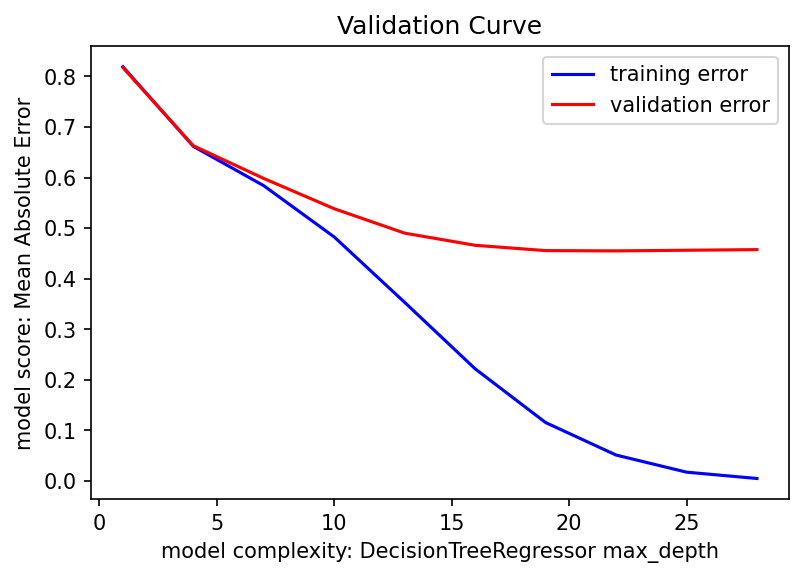

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    DecisionTreeRegressor()
)

depth = range(1, 30, 3)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='decisiontreeregressor__max_depth', 
    param_range=depth, scoring='neg_mean_absolute_error', 
    cv=3,
    n_jobs=-1
)

plt.figure(dpi=150)
plt.plot(depth, np.mean(-train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(-val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: DecisionTreeRegressor max_depth')
plt.ylabel('model score: Mean Absolute Error')
plt.legend();

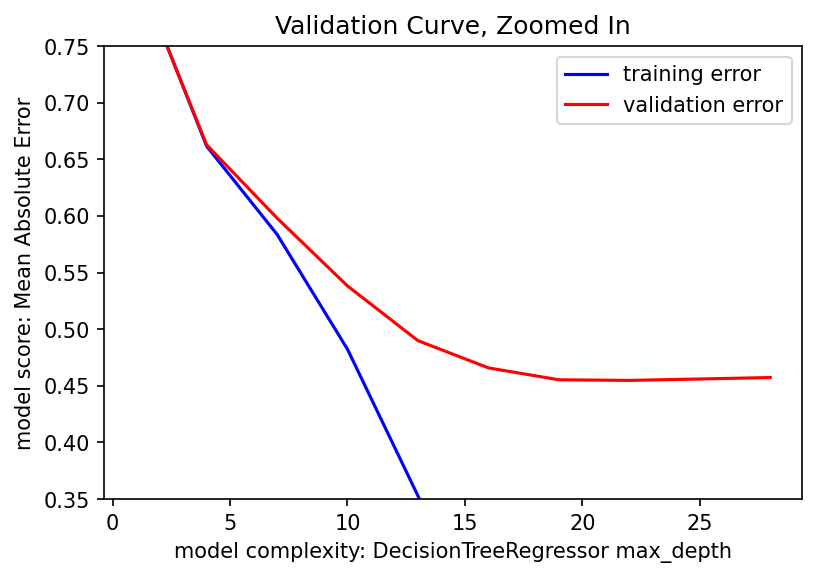

In [ ]:
plt.figure(dpi=150)
plt.plot(depth, np.mean(-train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(-val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve, Zoomed In')
plt.xlabel('model complexity: DecisionTreeRegressor max_depth')
plt.ylabel('model score: Mean Absolute Error')
plt.ylim((.35, .75))  # Zoom in
plt.legend();

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import Ridge

X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    SelectKBest(f_regression), 
    Ridge()
)


#define all options for hyper parameter in dictionary
#Note for pipelines, we need to use (named step + double underscore + paramater) 
param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'selectkbest__k': range(1, len(X_train.columns)+1), 
    'ridge__alpha': [0.1, 1, 10], 
}

# If you're on Colab, decrease n_iter & cv parameters 
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=5, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

In [ ]:
# If we used GridSearchCV instead of RandomizedSearchCV, 
# how many candidates would there be?
# 2 imputation strategies * n columns * 3 Ridge alphas
2 * len(X_train.columns) * 3

In [ ]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor

X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000), 
    
#     Remove this hyperparameter, because of an issue: 
#     https://github.com/scikit-learn-contrib/categorical-encoding/issues/184
#     'targetencoder__smoothing': uniform(1, 1000), 
    
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=3, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

In [ ]:
uniform(0, 1)

In [ ]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

In [ ]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').T

In [ ]:
pipeline = search.best_estimator_

In [ ]:
from sklearn.metrics import mean_absolute_error

X_test = test[features]
y_test = test[target]

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')

In [ ]:
# from sklearn.model_selection import cross_val_score
# k = 3
# scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
#                          scoring='neg_mean_absolute_error')
# print(f'MAE for {k} folds:', -scores)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# objList = train.select_dtypes(include = "object").columns
# print (objList)

In [ ]:
# le = LabelEncoder()

# for feat in objList:
#     train[feat] = le.fit(train[feat].astype(str))

# print (train.info())

In [ ]:
# from sklearn.model_selection import cross_val_score
# k = 3
# scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
#                          scoring='neg_mean_absolute_error')
# print(f'MAE for {k} folds:', -scores)

In [ ]:
# import category_encoders as ce from scipy.stats 
# import uniform from sklearn.ensemble 
# import RandomForestClassifier from sklearn.impute 
# import SimpleImputer from sklearn.model_selection 
# import RandomizedSearchCV from sklearn.pipeline 
# import make_pipeline

# pipeline = make_pipeline( ce.OrdinalEncoder(), SimpleImputer(), RandomForestClassifier(random_state=42) )

# param_distributions = { 'randomforestclassifier__n_estimators': range(50, 500), 'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 'randomforestclassifier__max_features': uniform(0, 1), 'randomforestclassifier__min_samples_leaf': [1, 10, 100], }

# search = RandomizedSearchCV( pipeline, param_distributions=param_distributions, n_iter=10, cv=3, scoring='accuracy', verbose=10, return_train_score=True, n_jobs=-1 )

# search.fit(X_train, y_train); 